In [78]:
import numpy as np
import math as mt
from PIL import Image as im
from matplotlib import pyplot as plt

def main(img_path):
    raw_image = im.open(img_path)
    image = np.array(raw_image)
    new_image = np.empty([image[:][0].size, image[0][:].size])
    width = image[0][:].size
    height = image[:][0].size

    init_lev = 256
    h = [0] * init_lev
    for x in image:
        for pixel_intensity in x:
            h[pixel_intensity] += 1

    p = [0] * init_lev
    for i, val in enumerate(h):
        p[i] = float(val) / (width * height)


    L = 8


    a = [0]
    for i in range(L):
        a.append((i + 1) * init_lev / L)
    a.append(256)


    b = []
    for i in range(L + 1):
        b.append(i * init_lev / L + init_lev / (2 * L))


    def E(a, b):
        sum = 0
        for nu in range(1, L + 1):
            for x in range(a[nu], a[nu + 1]):
                sum += (x - b[nu]) ** 2 * p[x]
        return sum


    T = 10
    a_new = a[:]
    b_new = b[:]
    prev_err = E(a_new, b_new)
    for t in range(T):   
        for nu in range(1, len(a_new) - 1):
            a_new[nu] = int(float((b_new[nu] + b_new[nu - 1])) / 2)

        for nu in range(len(b_new)):
            numerator = 0
            delimeter = 0
            for x in range(a_new[nu], a_new[nu + 1]):
                numerator += x * p[x]
                delimeter += p[x]

            if delimeter == 0:
                b_new[nu] = 0
            else:
                b_new[nu] = numerator / delimeter

        err = E(a_new, b_new)
        if prev_err - err > 0.1:
            break
        else:
            prev_err = err

    a_plot = [a_new[0]]
    for i in range(1, len(a_new) - 1):
        a_plot += [a_new[i]] * 2 
    a_plot.append(a_new[-1])

    b_plot = []
    for el in b_new:
        b_plot += [el] * 2

    plt.plot(a_plot, b_plot)
    plt.show()


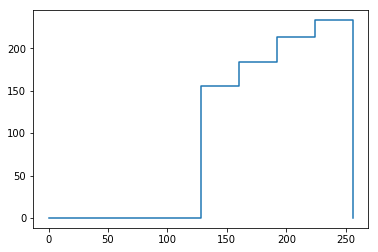

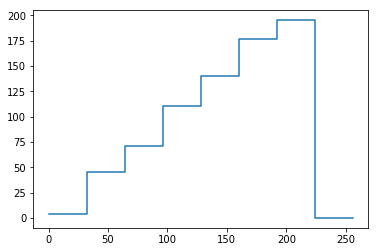

In [79]:
main('./images/bauckhage-gamma-1.png')
main('./images/bauckhage-gamma-2.png')
# main('./images/bauckhage.jpg')